### Curso: CC521 A Programación Evolutiva 2022-1
Alumno: Jordi Joel Bardales Rojas

## Práctica dirigida: Representación y Selección 


In [267]:
from __future__ import annotations
import math
import numpy as np
from enum import Enum
from bin_repr2 import dec2bin, bin2gray, my_map, inverse_map, bin2dec, gray2bin
import copy
import random 
import matplotlib.pyplot as plt
from typing import Callable,  NamedTuple
from itertools import combinations

class Representation(Enum):
    BIN = 0
    GRAY = 1
    DECIMAL = 2

## Problemas de optimización
Este laboratorio se mostrará varios métodos de selección como la selección proporcional, ranking lineal, torneo, uniforme y selección ruleta, luego se medirá la intensidad de selección en un problema de minimización.


### 1. Dado los siguientes problemas de minimización de una función $\min_\mathbf{x}f(\mathbf{x})$


In [227]:
f1 = lambda x: x[0]**4 + 5*x[0]**3 + 4*x[0]**2 - 4*x[0] + 1
f2 = lambda x: 0.2 + x[0]**2 + x[1]**2 - 0.1*math.cos(6*math.pi*x[0]) - 0.1*math.sin(6*math.pi*x[1])
f3 = lambda x: math.pow(1/6.931 - x[0]*x[1]/(x[2]*x[3]), 2)


Dominio

In [228]:
domain_1, n_var_1 = [-4.0, 1], 1
domain_2, n_var_2 = [-1, 1.0], 2
domain_3, n_var_3 = [12, 60.], 4


Parámetros del individuo tipados

In [229]:
class IndividualArguments(NamedTuple):
    domain: tuple[int, int]
    eps: float
    n_var: int
    gen_size: int
    default_repr: Representation = Representation.DECIMAL

Clase individuo 

In [230]:
class Individual():
    def __init__(self, phenotype: list[float], args: IndividualArguments):
        self.domain = args.domain
        self.eps = args.eps
        self.n_var = args.n_var
        self.gen_size = args.gen_size
        self.default_repr = args.default_repr
        self.phenotype = phenotype

    def getGenotype(self, my_repr: Representation = None):
        my_repr = self.default_repr if my_repr == None else my_repr
        list_repr: list[int] = []
        if my_repr == Representation.BIN:
            for gen in self.phenotype:
                list_repr.extend(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps), gen_size=self.gen_size))
        elif my_repr == Representation.GRAY:
            for gen in self.phenotype:
                list_repr.extend(bin2gray(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps), gen_size=self.gen_size)))
        else:
            list_repr = copy.deepcopy(self.phenotype)
        return list_repr

    @classmethod
    def new(cls, genotype, args: IndividualArguments):
        phenotype: list[int] = []
        if args.default_repr == Representation.BIN:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gen), args.domain[0], args.eps))
        elif args.default_repr == Representation.GRAY:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gray2bin(gen)), args.domain[0], args.eps))
        else:
            phenotype = copy.deepcopy(genotype)
        
        return cls(phenotype, args)

    @staticmethod
    def newLike(genotype: list[int], parent: Individual):
        args = IndividualArguments(parent.domain, parent.eps, parent.n_var, parent.gen_size, parent.default_repr)
        return Individual.new(genotype, args)

    @classmethod
    def newRandom(cls, args: IndividualArguments):
        phenotype = [round(random.uniform(args.domain[0], args.domain[1]), 6) for _ in range(args.n_var)]
        return cls(phenotype, args)


#### a) Representación del problema (1)
Implemente un programa en python que represente el cromosoma como una cadena binaria de 10 dígitos (10 bits) y muestre/imprima el Fenotipo y su representación binaria para una población de 10 individuos.

In [231]:
POPULATION_SIZE = 10
GEN_SIZE_1 = 10
eps_1 = (domain_1[1] - domain_1[0]) / (2**GEN_SIZE_1 - 1)
N_POINTS_1 = 2**GEN_SIZE_1

args1 = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, f1)

population_1 = [Individual.newRandom(args1) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")


Representación binaria
Genotipo 0 = [0, 0, 0, 1, 0, 1, 0, 0, 1, 0] Fenotipo 0 = [-3.6]
Genotipo 1 = [0, 1, 0, 1, 0, 0, 0, 0, 0, 1] Fenotipo 1 = [-2.430479]
Genotipo 2 = [1, 0, 0, 0, 0, 1, 0, 0, 1, 1] Fenotipo 2 = [-1.406961]
Genotipo 3 = [1, 1, 1, 0, 1, 0, 1, 1, 1, 0] Fenotipo 3 = [0.602032]
Genotipo 4 = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0] Fenotipo 4 = [-1.417109]
Genotipo 5 = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1] Fenotipo 5 = [-1.171455]
Genotipo 6 = [0, 1, 0, 0, 1, 1, 1, 1, 1, 0] Fenotipo 6 = [-2.443627]
Genotipo 7 = [0, 0, 1, 1, 0, 1, 0, 1, 0, 1] Fenotipo 7 = [-2.957276]
Genotipo 8 = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1] Fenotipo 8 = [-2.882693]
Genotipo 9 = [1, 0, 1, 0, 1, 1, 0, 1, 1, 1] Fenotipo 9 = [-0.603527]


Realizar lo mismo del ítem anterior para la representación en código de Gray.

In [232]:
print("Representación en código Gray")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [0, 0, 0, 1, 1, 1, 1, 0, 1, 1] Fenotipo 0 = [-3.6]
Genotipo 1 = [0, 1, 1, 1, 1, 0, 0, 0, 0, 1] Fenotipo 1 = [-2.430479]
Genotipo 2 = [1, 1, 0, 0, 0, 1, 1, 0, 1, 0] Fenotipo 2 = [-1.406961]
Genotipo 3 = [1, 0, 0, 1, 1, 1, 1, 0, 0, 1] Fenotipo 3 = [0.602032]
Genotipo 4 = [1, 1, 0, 0, 0, 1, 1, 0, 0, 0] Fenotipo 4 = [-1.417109]
Genotipo 5 = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0] Fenotipo 5 = [-1.171455]
Genotipo 6 = [0, 1, 1, 0, 1, 0, 0, 0, 0, 1] Fenotipo 6 = [-2.443627]
Genotipo 7 = [0, 0, 1, 0, 1, 1, 1, 1, 1, 1] Fenotipo 7 = [-2.957276]
Genotipo 8 = [0, 0, 1, 0, 0, 1, 0, 1, 1, 1] Fenotipo 8 = [-2.882693]
Genotipo 9 = [1, 1, 1, 1, 1, 0, 1, 1, 0, 0] Fenotipo 9 = [-0.603527]


Considerando las representaciones anteriores (cadena de 10 bits) ¿cual sería el tamaño del espacio intrínseco?


In [233]:
print(f"El espacio intrinseco tendría {N_POINTS_1} elementos con una precisión de {eps_1}")

El espacio intrinseco tendría 1024 elementos con una precisión de 0.004887585532746823


#### b) Representación del problema (2):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x, y$ estén representados por 5 bits cada uno y luego muestre/imprima el Fenotipo y su
representación binaria.

In [234]:
POPULATION_SIZE = 10
GEN_SIZE_2 = 5
eps_2 = (domain_2[1] - domain_2[0]) / (2**GEN_SIZE_2 - 1)
N_POINTS_2 = 2**GEN_SIZE_2

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, f2)

population_2 = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [1, 1, 0, 0, 1, 1, 1, 1, 1, 0] Fenotipo 0 = [0.630699, 0.924766]
Genotipo 1 = [0, 1, 0, 0, 1, 0, 0, 0, 0, 1] Fenotipo 1 = [-0.400944, -0.94276]
Genotipo 2 = [1, 0, 0, 0, 0, 1, 1, 0, 0, 0] Fenotipo 2 = [0.049456, 0.57059]
Genotipo 3 = [0, 1, 0, 1, 0, 0, 0, 0, 0, 1] Fenotipo 3 = [-0.379999, -0.934953]
Genotipo 4 = [0, 1, 0, 1, 1, 0, 1, 0, 0, 0] Fenotipo 4 = [-0.263002, -0.504952]
Genotipo 5 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fenotipo 5 = [0.9999, 0.915929]
Genotipo 6 = [0, 0, 1, 0, 0, 1, 0, 1, 0, 1] Fenotipo 6 = [-0.766735, 0.345476]
Genotipo 7 = [0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fenotipo 7 = [-0.049892, -0.026182]
Genotipo 8 = [0, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fenotipo 8 = [-0.385704, -0.301442]
Genotipo 9 = [0, 0, 1, 0, 0, 1, 0, 0, 1, 0] Fenotipo 9 = [-0.730943, 0.147073]


Realizar lo mismo del ítem anterior para la representación en código de Gray

In [235]:
print("Representación en código Gray")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [1, 0, 1, 0, 1, 1, 0, 0, 0, 1] Fenotipo 0 = [0.630699, 0.924766]
Genotipo 1 = [0, 1, 1, 0, 1, 0, 0, 0, 0, 1] Fenotipo 1 = [-0.400944, -0.94276]
Genotipo 2 = [1, 1, 0, 0, 0, 1, 0, 1, 0, 0] Fenotipo 2 = [0.049456, 0.57059]
Genotipo 3 = [0, 1, 1, 1, 1, 0, 0, 0, 0, 1] Fenotipo 3 = [-0.379999, -0.934953]
Genotipo 4 = [0, 1, 1, 1, 0, 0, 1, 1, 0, 0] Fenotipo 4 = [-0.263002, -0.504952]
Genotipo 5 = [1, 0, 0, 0, 0, 1, 0, 0, 0, 1] Fenotipo 5 = [0.9999, 0.915929]
Genotipo 6 = [0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fenotipo 6 = [-0.766735, 0.345476]
Genotipo 7 = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0] Fenotipo 7 = [-0.049892, -0.026182]
Genotipo 8 = [0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fenotipo 8 = [-0.385704, -0.301442]
Genotipo 9 = [0, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fenotipo 9 = [-0.730943, 0.147073]


Realizar lo mismo del ítem anterior para la representación real

In [236]:
print("Representación real")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.phenotype}")

Representación real
Individuo 0 = [0.630699, 0.924766]
Individuo 1 = [-0.400944, -0.94276]
Individuo 2 = [0.049456, 0.57059]
Individuo 3 = [-0.379999, -0.934953]
Individuo 4 = [-0.263002, -0.504952]
Individuo 5 = [0.9999, 0.915929]
Individuo 6 = [-0.766735, 0.345476]
Individuo 7 = [-0.049892, -0.026182]
Individuo 8 = [-0.385704, -0.301442]
Individuo 9 = [-0.730943, 0.147073]


Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual sería el tamaño del espacio intrínseco?


In [237]:
print(f"El espacio intrinseco tendría {N_POINTS_2} x {N_POINTS_2} = {2**(2*GEN_SIZE_2)} elementos con una precisión de {eps_2}")

El espacio intrinseco tendría 32 x 32 = 1024 elementos con una precisión de 0.06451612903225806


#### Representación del problema (3):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x_1, x_2, x_3, x_4$ estén representados por 6 bits cada uno y luego muestre/imprima el Fenotipo y su representación binaria.


In [238]:
POPULATION_SIZE = 10
GEN_SIZE_3 = 6
eps_3 = (60 - 12) / (2**GEN_SIZE_3 - 1)
N_POINTS_3 = 2**GEN_SIZE_3

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, f3)

population_3 = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0] Fenotipo 0 = [22.672533, 27.281418, 16.351214, 42.126839]
Genotipo 1 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fenotipo 1 = [36.522041, 16.145153, 52.379248, 56.801461]
Genotipo 2 = [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] Fenotipo 2 = [31.268746, 20.538274, 13.522556, 12.15477]
Genotipo 3 = [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0] Fenotipo 3 = [38.998614, 31.968147, 24.324468, 28.889808]
Genotipo 4 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0] Fenotipo 4 = [48.744366, 15.994355, 50.782779, 38.195018]
Genotipo 5 = [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1] Fenotipo 5 = [36.118919, 59.04689, 30.724225, 26.608464]
Genotipo 6 = [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1] Fenotipo 6 = [46.272336, 48.2

Realizar lo mismo del ítem anterior para la representación en código de Gray

In [239]:
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Genotipo 0 = [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fenotipo 0 = [22.672533, 27.281418, 16.351214, 42.126839]
Genotipo 1 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0] Fenotipo 1 = [36.522041, 16.145153, 52.379248, 56.801461]
Genotipo 2 = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0] Fenotipo 2 = [31.268746, 20.538274, 13.522556, 12.15477]
Genotipo 3 = [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1] Fenotipo 3 = [38.998614, 31.968147, 24.324468, 28.889808]
Genotipo 4 = [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1] Fenotipo 4 = [48.744366, 15.994355, 50.782779, 38.195018]
Genotipo 5 = [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0] Fenotipo 5 = [36.118919, 59.04689, 30.724225, 26.608464]
Genotipo 6 = [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0] Fenotipo 6 = [46.272336, 48.23176, 36.401281, 32.524

Realizar lo mismo del ítem anterior para la representación real.

In [240]:
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [22.672533, 27.281418, 16.351214, 42.126839]
Individuo 1 = [36.522041, 16.145153, 52.379248, 56.801461]
Individuo 2 = [31.268746, 20.538274, 13.522556, 12.15477]
Individuo 3 = [38.998614, 31.968147, 24.324468, 28.889808]
Individuo 4 = [48.744366, 15.994355, 50.782779, 38.195018]
Individuo 5 = [36.118919, 59.04689, 30.724225, 26.608464]
Individuo 6 = [46.272336, 48.23176, 36.401281, 32.524148]
Individuo 7 = [31.173072, 57.061081, 51.554867, 46.435652]
Individuo 8 = [48.09646, 42.529471, 43.914895, 23.450712]
Individuo 9 = [38.005097, 34.518264, 19.228332, 56.676076]


Considerando las representaciones anteriores (cadena de bits, representación real) ¿cual seria el tamaño del espacio intrínseco

In [241]:
print(f"El espacio intrinseco tendría {N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}={2**(4*GEN_SIZE_3)} elementos con una precisión de {eps_3}")

El espacio intrinseco tendría 64x64x64x64=16777216 elementos con una precisión de 0.7619047619047619


### 2. Gestión de la población: de la teoría se sabe que los métodos de selección son independientes del método de representación del algoritmo evolutivo, implemente los siguientes métodos de selección en python:

* Método de selección proporcional
* Método de selección basada en ranking lineal
* Método de torneo
* Método de selección uniforme
* Método de de la ruleta


In [242]:
class Selection:
    def __init__(self, nro_individuals: int):
        self.nro_individuals = nro_individuals

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        distribution = np.array(fitness) / sum(fitness)
        return random.choices(population, distribution, k=self.nro_individuals)


class ProportionalSelection(Selection):
    def __init__(self, nro_individuals: int):
        super().__init__(nro_individuals=nro_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        population = zip(population, fitness)

        sorted_population = sorted(population, key=lambda ind: ind[1], reverse=True)
        fitness_sum = sum([ind[1] for ind in population])
        selected: list[Individual] = []

        for _ in range(self.nro_individuals):
            # giramos la ruleta tantas veces como individuos existan
            shave = random.random() * fitness_sum
            roulette_sum = 0
            # recorremos los individuos en orden decreciente
            for ind in sorted_population:
                # como se recorre en orden decreciente tenemos que sumar el valor del fitness para saber donde cae
                roulette_sum += ind[1]
                # en el primero que sea mayor es cuando cae la ruleta asi que lo seleccionamos
                if roulette_sum > shave:
                    selected.append(ind[0])
                    break
        return selected


class TournamentSelection(Selection):
    def __init__(self, nro_individuals: int, tournament_size: int):
        super().__init__(nro_individuals=nro_individuals)
        self.tournament_size = tournament_size

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        population = list(zip(population, fitness))
        selected: list[Individual] = []
        for _ in range(self.nro_individuals):
            candidates = [random.choice(population) for _ in range(self.tournament_size)]
            selected.append(min(candidates, key=lambda ind: ind[1])[0])
        return selected


#### Operadores de variación

In [313]:
class Crossover:
    def __init__(self, probability: float):
        self.probability = probability

    def make(self, parent1: Individual, parent2: Individual):
        # one-point random-crossover
        if random.random() < self.probability:
            c1 = copy.deepcopy(parent1.getGenotype())
            c2 = copy.deepcopy(parent2.getGenotype())
            point = random.randint(1, len(c1) - 2)

            c1[point:], c2[point:] = c2[point:], c1[point:]
            return Individual.newLike(c1, parent1), Individual.newLike(c2, parent2)
        return None


class Mutation:
    def __init__(self, probability: float):
        self.probability = probability

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if random.random() < self.probability:
            # punto aleatorio de la cadea
            point = random.randint(0, len(mut) - 1)

            if len(mut) > ind.n_var:
                mut[point] = (mut[point] + 1) % 2
            else:
                mut[point] = random.uniform(ind.domain[0], ind.domain[1])
            return Individual.newLike(mut, ind)
        return None


##### Esquema general de un AE genérico 

In [377]:
def genenetic_algorithm(max_generation: int,
                        fitness: Callable[[list[float]], float],
                        population: list[Individual],
                        selection: Selection,
                        crossover: Crossover,
                        mutation: Mutation):
    best: list[Individual] = []
    generation_number = 0
    while generation_number < max_generation:
        generation_number += 1
        # evaluacion de la aptitud de la población inicial (n individuos)
        population_fitness = [fitness(ind.phenotype) for ind in population]
        # seleccion de los padres (para la reproducción)
        parents = selection.get_individuals(population, population_fitness)
        # operadores de variación
        offspring: list[Individual] = []
        # crossover
        for p1, p2 in combinations(parents, 2):
            if not p1 == p2:
                if (childs := crossover.make(p1, p2)) != None:
                    offspring += childs
        # mutation
        for ind in parents:
            if (mutant := mutation.make(ind)) != None:
                offspring.append(mutant)
        # evaluacion de la aptitud de los λ descendientes
        offspring_fitness = [fitness(ind.phenotype) for ind in offspring]
        # λ individuos aptos + n padres
        population += offspring
        population_fitness += offspring_fitness
        # mejor individuo de cada generación
        best.append(get_best(population, fitness))
        # selección del ambiente n
        population = selection.get_individuals(population, population_fitness)
        population_fitness = []
        # impresión de la generación
        if generation_number % int(math.sqrt(max_generation)) == 0:
            print("Generation:", generation_number)

    plt.plot([f1(x.phenotype) for x in best], "r-")
    plt.title(f"Generation number {generation_number}")
    plt.show()
    return best


### 3. Evaluación de la intensidad de selección: para los problemas planteados en la pregunta (1) evaluar la presión de selección considerando los siguientes casos.

In [295]:
def get_best(population: list[Individual], fitness: Callable):
    best = population[0]
    for ind in population:
        if fitness(ind.phenotype) < fitness(best.phenotype):
            best = ind
    return best


a) Para el primer caso (ecuación 1) considerar la representación binaria, una población inicial 15 individuos del cual debe seleccionar 10 padres y crear 10 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 15 individuos), evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generation: 10
Generation: 20
Generation: 30
Generation: 40
Generation: 50
Generation: 60
Generation: 70
Generation: 80
Generation: 90
Generation: 100


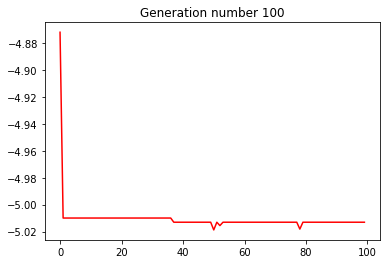

In [335]:
MAX_GENERATION = 100
POPULATION_SIZE = 15
args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, Representation.GRAY)
initial_population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]
best = genenetic_algorithm(max_generation=100,
                           fitness=f1,
                           population=initial_population,
                           selection=TournamentSelection(nro_individuals=10, tournament_size=3),
                           crossover=Crossover(probability=0.8),
                           mutation=Mutation(probability=0.01))


In [336]:
solution = get_best(best, f1)
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value
 x* = [-2.9687194525904204], f(x*) = -5.018773695719695


b) Para el segundo caso (ecuación 2) considerar la representación Gray, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos), evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generation: 10
Generation: 20
Generation: 30
Generation: 40
Generation: 50
Generation: 60
Generation: 70
Generation: 80
Generation: 90
Generation: 100


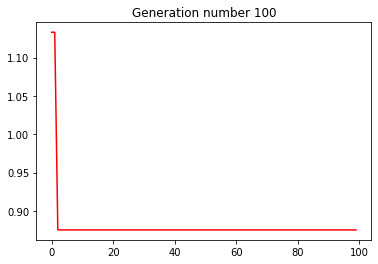

In [343]:
# GA CANONICAL FLOW
MAX_GENERATION = 100
POPULATION_SIZE = 20
args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.BIN)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]

# pipeline ga
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=TournamentSelection(nro_individuals=15, tournament_size=5),
                           crossover=Crossover(probability=0.8),
                           mutation=Mutation(probability=0.01))



In [344]:
solution = get_best(best, f2)
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value
 x* = [-0.032258064516129004, 0.09677419354838701], f(x*) = 0.031521771255919276


c) Para el tercer caso (ecuación 3) considerar la representación real, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos), evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generation: 22
Generation: 44
Generation: 66
Generation: 88
Generation: 110
Generation: 132
Generation: 154
Generation: 176
Generation: 198
Generation: 220
Generation: 242
Generation: 264
Generation: 286
Generation: 308
Generation: 330
Generation: 352
Generation: 374
Generation: 396
Generation: 418
Generation: 440
Generation: 462
Generation: 484


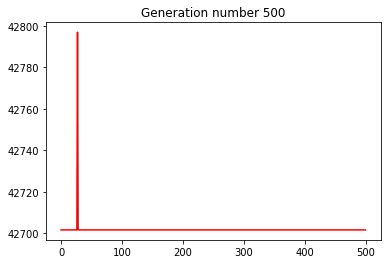

In [379]:
# GA CANONICAL FLOW
MAX_GENERATION = 500
POPULATION_SIZE = 20
args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, Representation.DECIMAL)
initial_population = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]

# pipeline ga
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=TournamentSelection(nro_individuals=15, tournament_size=5),
                           crossover=Crossover(probability=0.8),
                           mutation=Mutation(probability=0.01))



In [380]:
solution = get_best(best, f3)
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value
 x* = [13.224468926400759, 24.76035, 39.220613, 57.923091], f(x*) = 42796.87434467451
